In [55]:
# Figure 2

setwd('/Users/ibishara/Desktop/FELINE_C1/')

# packages
library(data.table)
library(tidyverse)
library(qs)

# data
meta_sub_LQ <- fread('metadata_subsample_LQ_no_id.txt', sep='\t', data.table=F) # low quality subsample metadata
meta_sub_HQ <- fread('metadata_subsample_HQ_no_id.txt', sep='\t', data.table=F) # high quality subsample metadata

meta_sub <- bind_rows(meta_sub_HQ, meta_sub_LQ) # combine HQ & LQ metadata



Attaching package: 'data.table'


The following objects are masked from 'package:reshape2':

    dcast, melt


The following objects are masked from 'package:dplyr':

    between, first, last


Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v purrr   0.3.4
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x data.table::between() masks dplyr::between()
x dplyr::filter()       masks stats::filter()
x data.table::first()   masks dplyr::first()
x dplyr::lag()          masks stats::lag()
x data.table::last()    masks dplyr::last()
x purrr::transpose()    masks data.table::transpose()



[1] 35000     6

In [2]:
# Figure 2
## indexing 
# Lineage
epi.ind <- which(meta_sub$Lineage == "Epithelial_cells")
mes.ind <- which(meta_sub$Lineage == "Stromal_cells")
hem.ind <- which(meta_sub$Lineage == "Immune_cells")

# LQ cell type labels
tcell.ind.LQ <- which( meta_sub$hpca == "T_cells" )
bcell.ind.LQ <- which( meta_sub$hpca == "B_cell" )
macro.ind.LQ <- which( meta_sub$hpca == "Macrophage" | meta_sub$hpca == "Monocyte")
fibro.ind.LQ <- which( meta_sub$hpca == "Fibroblasts")

# LQ cell type labels
tcell.ind.HQ <- which( meta_sub$Celltype == "T cells" )
bcell.ind.HQ <- which( meta_sub$Celltype == "B cells" )
macro.ind.HQ <- which( meta_sub$Celltype == "Macrophages")
fibro.ind.HQ <- which( meta_sub$Celltype == "Fibroblasts")

# combined cell type labels
tcell.ind <- c(tcell.ind.LQ, tcell.ind.HQ)
bcell.ind <- c(bcell.ind.LQ, bcell.ind.HQ)
macro.ind <- c(macro.ind.LQ, macro.ind.HQ)
fibro.ind <- c(fibro.ind.LQ, fibro.ind.HQ)

## setting cut-offs
## JF's cut-off for FELINE_C1: > 1500 UMI. 500 - 7000 genes, mtDNA% < 20%
nCount_RNA_cutoff <- 1500
new.nCount_RNA_cutoff <- 450

all.retained <- length(which(meta_sub$nCount_RNA > nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA )
epi.retained <- length(which(meta_sub$nCount_RNA[epi.ind] > nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[epi.ind] )
mes.retained <- length(which(meta_sub$nCount_RNA[mes.ind] > nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[mes.ind] )
hem.retained <- length(which(meta_sub$nCount_RNA[hem.ind] > nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[hem.ind] )

tcell.retained <- length(which(meta_sub$nCount_RNA[tcell.ind] > nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[tcell.ind] )
macro.retained <- length(which(meta_sub$nCount_RNA[macro.ind] > nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[macro.ind] )
fibro.retained <- length(which(meta_sub$nCount_RNA[fibro.ind] > nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[fibro.ind] )
bcell.retained <- length(which(meta_sub$nCount_RNA[bcell.ind] > nCount_RNA_cutoff)) / length(meta_sub$nCount_RNA[bcell.ind] )


## Plot number of reads and genes by Cell type. Epithelial cells are used as a reference 

title.size <- 1.4
lab.size <- 1.0
sub.size <- 1.4

pdf('Figures/Fig.2.pdf', width = 14, height = 6)
par(mfrow=c(2,4), mar=c(6,5,5,1))


v <- list(epi.ind, mes.ind)
n <- list(epi.retained, mes.retained)
lapply( , FUN(v, n) {     
plot(main = "Epithelial cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[epi.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
mtext(line= -17.3, adj=0.5, cex=1, paste('Percent cells retained:', round(100*epi.retained),'%' ))  # subtitle
mtext(line= 0.7, adj=0.5, cex=0.8, paste('Average reads per cell:', round(mean(meta_sub$nCount_RNA[epi.ind])) ),)  # subtitle
},var2=n)


plot(main = "All cells: total reads (log10)", density(log10(meta_sub$nCount_RNA)), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
mtext(line= -17.3, adj=0.5, cex=1, paste('Percent cells retained:', round(100*all.retained),'%' ))  # subtitle
mtext(line= 0.7, adj=0.5, cex=0.8, paste('Average reads per cell:', round(mean(meta_sub$nCount_RNA)) ),)  # subtitle

## Lineage plots
plot(main = "Epithelial cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[epi.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
mtext(line= -17.3, adj=0.5, cex=1, paste('Percent cells retained:', round(100*epi.retained),'%' ))  # subtitle
mtext(line= 0.7, adj=0.5, cex=0.8, paste('Average reads per cell:', round(mean(meta_sub$nCount_RNA[epi.ind])) ),)  # subtitle

plot(main = "Stromal cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[mes.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
mtext(line= -17.3, adj=0.5, cex=1, paste('Percent cells retained:', round(100*mes.retained),'%' ))  # subtitle
mtext(line= 0.7, adj=0.5, cex=0.8, paste('Average reads per cell:', round(mean(meta_sub$nCount_RNA[mes.ind])) ),)  # subtitle

plot(main = "Immune cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[hem.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
mtext(line= -17.3, adj=0.5, cex=1, paste('Percent cells retained:', round(100*hem.retained),'%' ))  # subtitle
mtext(line= 0.7, adj=0.5, cex=0.8, paste('Average reads per cell:', round(mean(meta_sub$nCount_RNA[hem.ind])) ),)  # subtitle

## Cell type plots
plot(main = "Fibroblasts: total reads (log10)", density(log10(meta_sub$nCount_RNA[fibro.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
mtext(line= -17.3, adj=0.5, cex=1, paste('Percent cells retained:', round(100*fibro.retained ),'%' ))  # subtitle
mtext(line= 0.7, adj=0.5, cex=0.8, paste('Average reads per cell:', round(mean(meta_sub$nCount_RNA[fibro.ind])) ),)  # subtitle

plot(main = "B-cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[bcell.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
mtext(line= -17.3, adj=0.5, cex=1, paste('Percent cells retained:', round(100*bcell.retained ),'%' ))  # subtitle
mtext(line= 0.7, adj=0.5, cex=0.8, paste('Average reads per cell:', round(mean(meta_sub$nCount_RNA[bcell.ind])) ),)  # subtitle

plot(main = "T-cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[tcell.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
mtext(line= -17.3, adj=0.5, cex=1, paste('Percent cells retained:', round(100*tcell.retained ),'%' ))  # subtitle
mtext(line= 0.7, adj=0.5, cex=0.8, paste('Average reads per cell:', round(mean(meta_sub$nCount_RNA[tcell.ind])) ),)  # subtitle

plot(main = "Macrophages/Monocytes: total reads (log10)", density(log10(meta_sub$nCount_RNA[macro.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred")
mtext(line= -17.3, adj=0.5, cex=1, paste('Percent cells retained:', round(100*macro.retained ),'%' ),)  # subtitle
mtext(line= 0.7, adj=0.5, cex=0.8, paste('Average reads per cell:', round(mean(meta_sub$nCount_RNA[macro.ind])) ),)  # subtitle




dev.off()
options(repr.plot.width=14, repr.plot.height=6)



pdf 
  2

In [9]:
options(warn=-1) # warnings off

# Figure 3 | supp. 1   | supp. 2 

setwd('/Users/ibishara/Desktop/FELINE_C1/')

# packages
library(data.table)
library(ggridges)
library(ggpubr)
library(stringr)

# data
all.perf <- list.files(path = "/Users/ibishara/Desktop/FELINE_C1/", pattern = "SCN_Performance*", recursive = FALSE)  # create a list of raw count tables from all batches
perf.list.SCN <- lapply( all.perf, FUN = function(x) {fread(x, sep='auto')})
perf.SCN <- as.data.frame(do.call(rbind, perf.list.SCN))  #join list of tables 

all.perf <- list.files(path = "/Users/ibishara/Desktop/FELINE_C1/", pattern = "SR_Performance*", recursive = FALSE)  # create a list of raw count tables from all batches
perf.list.SR <- lapply( all.perf, FUN = function(x) {fread(x, sep='auto')})
perf.SR <- as.data.frame(do.call(rbind, perf.list.SR))  #join list of tables 


# distribution clean-up
# table_type = reads, genes
# method = poisson, non-binary, binary

dist.clean <- function(table_type, method){
    dist <- fread(paste('SCN_', table_type, '_distribution_', method, '.txt' , sep=''), sep = '\t') # read distribution table | same for SCN and SR

    # data clean-up
    dist$V1 <- NULL
    dist <- t(dist)
    colnames(dist) <- dist[1,]
    dist <- dist[-1,]
    dist <- melt(dist)
    dist <- dist[,-1]
    dist$value <- as.numeric(dist$value)
    return(dist)
}

dist.reads_poisson <- dist.clean('reads', 'poisson')
dist.genes_poisson <- dist.clean('genes', 'poisson')
dist.reads_nonbin <- dist.clean('reads', 'non-binary')
dist.genes_nonbin <- dist.clean('genes', 'non-binary')
dist.reads_binary <- dist.clean('reads', 'binary')
dist.genes_binary <- dist.clean('genes', 'binary')

# Calculates mean and median for plot annotations 
summ <- function(x) c(Mean = mean(x), median = median(x))
summ.clean <- function(mat) {
    stats <- aggregate(value ~  Var2, mat, summ, simplify = TRUE)
    stats <- cbind(stats[1], round(stats[[2]]))
    return(stats)
}

stat.reads_poisson <- summ.clean(dist.reads_poisson)
stat.genes_poisson <- summ.clean(dist.genes_poisson)
stat.reads_binary <- summ.clean(dist.reads_binary)
stat.genes_binary <- summ.clean(dist.genes_binary)
stat.reads_nonbin <- summ.clean(dist.reads_nonbin)
stat.genes_nonbin <- summ.clean(dist.genes_nonbin)



Attaching package: 'data.table'


The following objects are masked from 'package:reshape2':

    dcast, melt


The following objects are masked from 'package:dplyr':

    between, first, last



Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




In [103]:
# Figure 3c,d | supp. 1c,d  | supp. 2c,d 

# train = 'SCN', 'SR'
# method = 'poisson', 'binary', 'non-binary'
# function plots the AUC at different thresholds of a 'train' algorithm and transformed by 'method'
AUCplot <- function(train, method) {
    if (train == 'SCN'){ 
        train = perf.SCN
        train.name <- 'SCN trained'

    } else if(train == 'SR') {
        train = perf.SR
        train.name <- 'SingleR trained'
        }

    # AUC plot    
    AUC_pROC <- as.numeric(train$AUC_pROC)
    data <- train[train$method == method,]
    data <- data[order(data$AUC_pROC),]
    data$threshold <- as.factor(data$threshold)

    main.levels <- levels(data$threshold)[12:length(levels(data$threshold))]  #c('0.6','0.7','0.8','0.9','1.0','1.5','2.0','3.0','4.0','untransformed')
    inset.levels <- levels(data$threshold)[1:11] #c('0.0','0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45','0.5')

    plot <- ggplot(data, aes(threshold, AUC_pROC )) + 
                geom_point(aes(color = as.factor(class)), size = 4, alpha = 0.7) + 
                xlab("threshold (x1000)") + ylab("AUROCC") + labs(color='Class')  +
                theme_classic() + 
                theme( plot.title = element_text(vjust = 2, hjust = 0.5)) + # center plot title
                ggtitle(paste(train.name, "transformed", method, sep =' - ')) 

    # main.plot <- plot +       
    #             geom_point(aes(color = as.factor(class)), size = 2.5, alpha = 0.7) + 
    #             scale_x_discrete(breaks=main.levels, limits=main.levels) +
    #             ylim(min(data$AUC_pROC[22:42]*0.9), max(data$AUC_pROC[22:42])) +
    #             ggtitle(paste(train.name, "transformed", method, sep =' - ')) 


    # inset.plot <- plot + 
    #             geom_point(aes(color = as.factor(class)), size = 2.5, alpha = 0.7) + 
    #             scale_x_discrete(guide=guide_axis(n.dodge=2), breaks=inset.levels, limits=inset.levels) +
    #             scale_y_continuous(limits=c(min(data$AUC_pROC[1:22]*0.9), max(data$AUC_pROC[1:22])*1.1), breaks = c(0.5, 0.7, 0.9), labels = c('0.5', '0.7', '0.9')) + 
    #             theme(legend.position = "none", axis.title.x = element_blank(), axis.title.y = element_blank(), axis.text = element_text(color = 'black'))
                

    # ggdraw() +
    # draw_plot(main.plot ) +
    # draw_plot(inset.plot, x = 0.5, y = .15, width = .37, height = .4)
    # spacer <- NULL
    # ggarrange(grobs =  inset.plot, spacer, main.plot, ncol = 3, nrow = 1, widths=c(100, 20, 100),   common.legend = TRUE) 
    plot
}


# summary plots
plot1 <- AUCplot('SR', 'poisson')
plot2 <- AUCplot('SCN', 'poisson')

plot3 <- AUCplot('SR', 'non-binary')
plot4 <- AUCplot('SCN', 'non-binary')

plot5 <- AUCplot('SR', 'binary')
plot6 <- AUCplot('SCN', 'binary')



pdf('Figures/Fig.3c.pdf', width = 14, height = 6)
plot1
dev.off()

pdf('Figures/Fig.3d.pdf', width = 14, height = 6)
plot2
dev.off()

pdf('Figures/Supp.2c.pdf', width = 14, height = 6)
plot3
dev.off()

pdf('Figures/Supp.2d.pdf', width = 14, height = 6)
plot4
dev.off()

pdf('Figures/Supp.3c.pdf', width = 14, height = 6)
plot5
dev.off()

pdf('Figures/Supp.3d.pdf', width = 14, height = 6)
plot6
dev.off()

options(repr.plot.width=14, repr.plot.height=6)

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

In [102]:
# Figure 3a,b | supp. 1a,b | supp. 2a,b

mean.v = -70
median.v = -68
mean.median.h = 22.5
# show reads and genes distribution, mean and median 
statplot <- function(method){
    if (method == 'binary'){
        table_type <- 'genes'
        dist.reads.data <- dist.reads_binary
        dist.genes.data <- dist.genes_binary
        stats.reads.data <- stat.reads_binary
        stats.genes.data <- stat.genes_binary

        } else if (method == 'poisson'){
        table_type <- 'reads'
        dist.reads.data <- dist.reads_poisson
        dist.genes.data <- dist.genes_poisson
        stats.reads.data <- stat.reads_poisson
        stats.genes.data <- stat.genes_poisson


        } else if (method == 'non-binary'){
        table_type <- 'genes'
        dist.reads.data <- dist.reads_nonbin
        dist.genes.data <- dist.genes_nonbin
        stats.reads.data <- stat.reads_nonbin
        stats.genes.data <- stat.genes_nonbin
        }
    # UMI distribution plot 
    plot1 <- ggplot(dist.reads.data, aes(Var2, value)) + 
                geom_boxplot() + 
                stat_summary(fun= mean, colour="darkred", geom="point", shape=18, size=2, show.legend=FALSE) + # mean figure
                geom_text(data = stats.reads.data, aes(label = Mean, y =  10), vjust= mean.v, size = 2.4, colour="darkred") +  # mean data
                geom_text(data = stats.reads.data, aes(label = median, y =  10), vjust= median.v, size = 2.4, colour="black") +  # median data 
                xlab(paste('number of', table_type, 'threshold (x1000)'))  + ylab("number of reads observed") + 
                scale_x_discrete(guide=guide_axis(n.dodge=2)) +
                theme_classic() +
                theme(plot.title = element_text(vjust = 9, hjust = 0.5), # title centered & up to accomodate stats annotations
                    axis.title=element_text(size= 9,face="bold")) + # adjust axis label sizes
                coord_cartesian(clip = "off")+
            theme(plot.margin = unit(c(0,1.5,0.5,0.5), "cm"))

    # genes distribution plot 
    plot2 <- ggplot(dist.genes.data, aes(as.factor(Var2), value)) + 
            geom_boxplot() + 
            stat_summary(fun= mean, colour="darkred", geom="point", shape=18, size=2, show.legend=FALSE) + # mean figure
            geom_text(data = stats.genes.data, aes(label = Mean, y =  10), vjust= mean.v, size = 2.4, colour="darkred") +  # mean data 
            geom_text(data = stats.genes.data, aes(label = median, y =  10), vjust= median.v, size = 2.4, colour="black") +  # median data 
            xlab(paste('number of', table_type, 'threshold (x1000)')) + ylab("number of genes observed") + 
            scale_x_discrete(guide=guide_axis(n.dodge=2)) +
            theme_classic() +
            theme(plot.title = element_text(vjust = 9, hjust = 0.5), # title centered & up to accomodate stats annotations
                axis.title=element_text(size= 9,face="bold") ) + 
            coord_cartesian(clip = "off") +
            theme(plot.margin = unit(c(0,1.5,0.5,0.5), "cm"))

    spacer <- NULL
    ggarrange(grobs = spacer,spacer,spacer,plot1, spacer, plot2, ncol = 3, nrow = 2, widths=c( 100, 10, 100),  heights=c( 10, 100)) 
}

plot1 <- statplot('poisson')
plot2 <- statplot('non-binary')
plot3 <- statplot('binary')

pdf('Figures/Fig.3ab.pdf', width = 16, height = 6)
plot1
dev.off()

pdf('Figures/Supp.2ab.pdf', width = 16, height = 6)
plot2
dev.off()

pdf('Figures/Supp.3ab.pdf', width = 16, height = 6)
plot3
dev.off()

options(repr.plot.width=16, repr.plot.height=6)



pdf 
  2

pdf 
  2

pdf 
  2

In [1]:
# Figure 4

library(qs)
library(Seurat)
library(singleCellNet)

setwd('/Users/ibishara/Desktop/FELINE_C1/')

seu_HQ <- qread(file = "seu_HQ_no_id.qs")
seu_HQ <- subset(x = seu_HQ, subset = Celltype != "Normal epithelial cells")   ## Removes normal epithelial cells. Genes unique to normal epi cells are removed from analysis downstream
seu_HQ <- subset(seu_HQ, subset = nCount_RNA < 15000 ) 
##


red.reads <- function(x, y){
    x <- round(x * rpois(n=length(x), lambda=y/sum(x)))
    return(x)
    }

meta <- seu_HQ@meta.data
seu.HQ.counts <- GetAssayData(seu_HQ, assay = "RNA")

# class <- 'Celltype' , 'Lineage'
# i <- numerical threshold
umap_transformed <- function(class, i){
    set.seed(200)

    # Split 50 / 50 
    ncells <- 3000 # uses half for training
    stList = splitCommon(sampTab = meta, ncells = ncells, dLevel = class)
    stSub = stList[[1]]
    stTrain = stSub[sample(nrow(stSub), round(nrow(stSub)/2)), ]
    stTest = stSub[! rownames(stSub) %in% rownames(stTrain) ,]
    counts = seu.HQ.counts[ , rownames(stTest)]

    transformed <- apply(X = counts, MARGIN = 2, FUN = red.reads, y = i) # run 2nd function to reduce the number of count per cell above threshold. iterates over columns (cells)
    meta_transformed <- meta[colnames(transformed), ]
        if ( class == 'Lineage'){ table(meta_transformed$Lineage)
        } else if ( class == 'Celltype') {table(meta_transformed$Celltype)    }


    seu_HQ_transformed <- CreateSeuratObject(counts= transformed, min.features= 0, min.cells = 0, names.delim= "_", meta.data= meta_transformed) 

    ## Normalize and scale 

    seu_HQ_transformed <- NormalizeData(seu_HQ_transformed, verbose = FALSE)
    seu_HQ_transformed <- FindVariableFeatures(seu_HQ_transformed, verbose = FALSE)
    genes <- rownames(seu_HQ_transformed)
    seu_HQ_transformed <- ScaleData(seu_HQ_transformed, features = genes, verbose = FALSE)
    seu_HQ_transformed <- RunPCA(seu_HQ_transformed, features = VariableFeatures(object = seu_HQ_transformed), verbose = FALSE)
    ElbowPlot(seu_HQ_transformed, ndims = 50)

    ## Cell clustering
    seu_HQ_transformed <- FindNeighbors(seu_HQ_transformed, dims = 1:10, verbose = FALSE) 
    # seu_HQ_transformed <- FindClusters(seu_HQ_transformed, resolution = 0.1, verbose = FALSE)

    ## UMAP
    seu_HQ_transformed <- RunUMAP(seu_HQ_transformed, dims = 1:10, verbose = FALSE)
    DimPlot(seu_HQ_transformed, reduction = "umap", group.by = class) + ggtitle(i)
}



qs v0.23.6.

Attaching SeuratObject

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: pheatmap

Loading required package: reshape2

Loading required package: cowplot



In [2]:
# Figure 4
library(parallel)
library(patchwork)

numCores <- detectCores()

celltype <- mclapply(c(1500, 450, 350, 250, 150),
             FUN=function(i) umap_transformed('Celltype', i) + ggtitle(i),
             mc.cores = numCores)

lineage <- mclapply(c(1500, 450, 350, 250, 150),
             FUN=function(i) umap_transformed('Lineage', i) + ggtitle(i),
             mc.cores = numCores)




Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




In [7]:
# Figure 4
combined.lineage <- lineage[[1]]+ lineage[[2]] + lineage[[3]] + lineage[[4]] + lineage[[5]] & theme(legend.position = "right") 
combined.celltype <- celltype[[1]]+ celltype[[2]] + celltype[[3]] + celltype[[4]] + celltype[[5]] & theme(legend.position = "right") 

pdf('Figures/Fig.4a.pdf', width = 16, height = 4)
    combined.lineage + plot_layout(guides = "collect", ncol =5)
dev.off()

pdf('Figures/Fig.4b.pdf', width = 16, height = 4)
    combined.celltype + plot_layout(guides = "collect", ncol =5)
dev.off()



pdf 
  2

pdf 
  2

In [60]:
# Figure 5

setwd('/Users/ibishara/Desktop/FELINE_C1/')

# packages
library(data.table)
library(tidyverse)
library(qs)
library(ggplot2)
library(patchwork)

# data
meta_sub_LQ <- fread('metadata_subsample_LQ_no_id.txt', sep='\t', data.table=F) # low quality subsample metadata
meta_sub_HQ <- fread('metadata_subsample_HQ_no_id.txt', sep='\t', data.table=F) # high quality subsample metadata

meta_sub <- bind_rows(meta_sub_HQ, meta_sub_LQ) # combine HQ & LQ metadata


## indexing 
# Lineage
epi.ind <- which(meta_sub$Lineage == "Epithelial_cells")
mes.ind <- which(meta_sub$Lineage == "Stromal_cells")
hem.ind <- which(meta_sub$Lineage == "Immune_cells")

# LQ cell type labels
tcell.ind.LQ <- which( meta_sub$hpca == "T_cells" )
bcell.ind.LQ <- which( meta_sub$hpca == "B_cell" )
macro.ind.LQ <- which( meta_sub$hpca == "Macrophage" | meta_sub$hpca == "Monocyte")
fibro.ind.LQ <- which( meta_sub$hpca == "Fibroblasts")

# LQ cell type labels
tcell.ind.HQ <- which( meta_sub$Celltype == "T cells" )
bcell.ind.HQ <- which( meta_sub$Celltype == "B cells" )
macro.ind.HQ <- which( meta_sub$Celltype == "Macrophages")
fibro.ind.HQ <- which( meta_sub$Celltype == "Fibroblasts")

# combined cell type labels
tcell.ind <- c(tcell.ind.LQ, tcell.ind.HQ)
bcell.ind <- c(bcell.ind.LQ, bcell.ind.HQ)
macro.ind <- c(macro.ind.LQ, macro.ind.HQ)
fibro.ind <- c(fibro.ind.LQ, fibro.ind.HQ)


## setting cut-offs
## JF's cut-off for FELINE_C1: > 2000 UMI. 500 - 7000 genes 
nCount_RNA_cutoff <- 1500
new.nCount_RNA_cutoff <- 450

pre.retained.all <- length(which(meta_sub$nCount_RNA > nCount_RNA_cutoff))
post.retained.all <- length(which(meta_sub$nCount_RNA < nCount_RNA_cutoff & meta_sub$nCount_RNA > new.nCount_RNA_cutoff))

pre.retained.epi <- length(which(meta_sub$nCount_RNA[epi.ind] > nCount_RNA_cutoff))
post.retained.epi <- length(which(meta_sub$nCount_RNA[epi.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[epi.ind] > new.nCount_RNA_cutoff))

pre.retained.mes <- length(which(meta_sub$nCount_RNA[mes.ind] > nCount_RNA_cutoff))
post.retained.mes <- length(which(meta_sub$nCount_RNA[mes.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[mes.ind] > new.nCount_RNA_cutoff))

pre.retained.hem <- length(which(meta_sub$nCount_RNA[hem.ind] > nCount_RNA_cutoff))
post.retained.hem <- length(which(meta_sub$nCount_RNA[hem.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[hem.ind] > new.nCount_RNA_cutoff))


pre.retained.fibro <- length(which(meta_sub$nCount_RNA[fibro.ind] > nCount_RNA_cutoff))
post.retained.fibro <- length(which(meta_sub$nCount_RNA[fibro.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[fibro.ind] > new.nCount_RNA_cutoff))

pre.retained.bcell <- length(which(meta_sub$nCount_RNA[bcell.ind] > nCount_RNA_cutoff))
post.retained.bcell <- length(which(meta_sub$nCount_RNA[bcell.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[bcell.ind] > new.nCount_RNA_cutoff))

pre.retained.tcell <- length(which(meta_sub$nCount_RNA[tcell.ind] > nCount_RNA_cutoff))
post.retained.tcell <- length(which(meta_sub$nCount_RNA[tcell.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[tcell.ind] > new.nCount_RNA_cutoff))

pre.retained.macro <- length(which(meta_sub$nCount_RNA[macro.ind] > nCount_RNA_cutoff))
post.retained.macro <- length(which(meta_sub$nCount_RNA[macro.ind] < nCount_RNA_cutoff & meta_sub$nCount_RNA[macro.ind] > new.nCount_RNA_cutoff))



[1] 1692

[1] 2976

[1] 4668

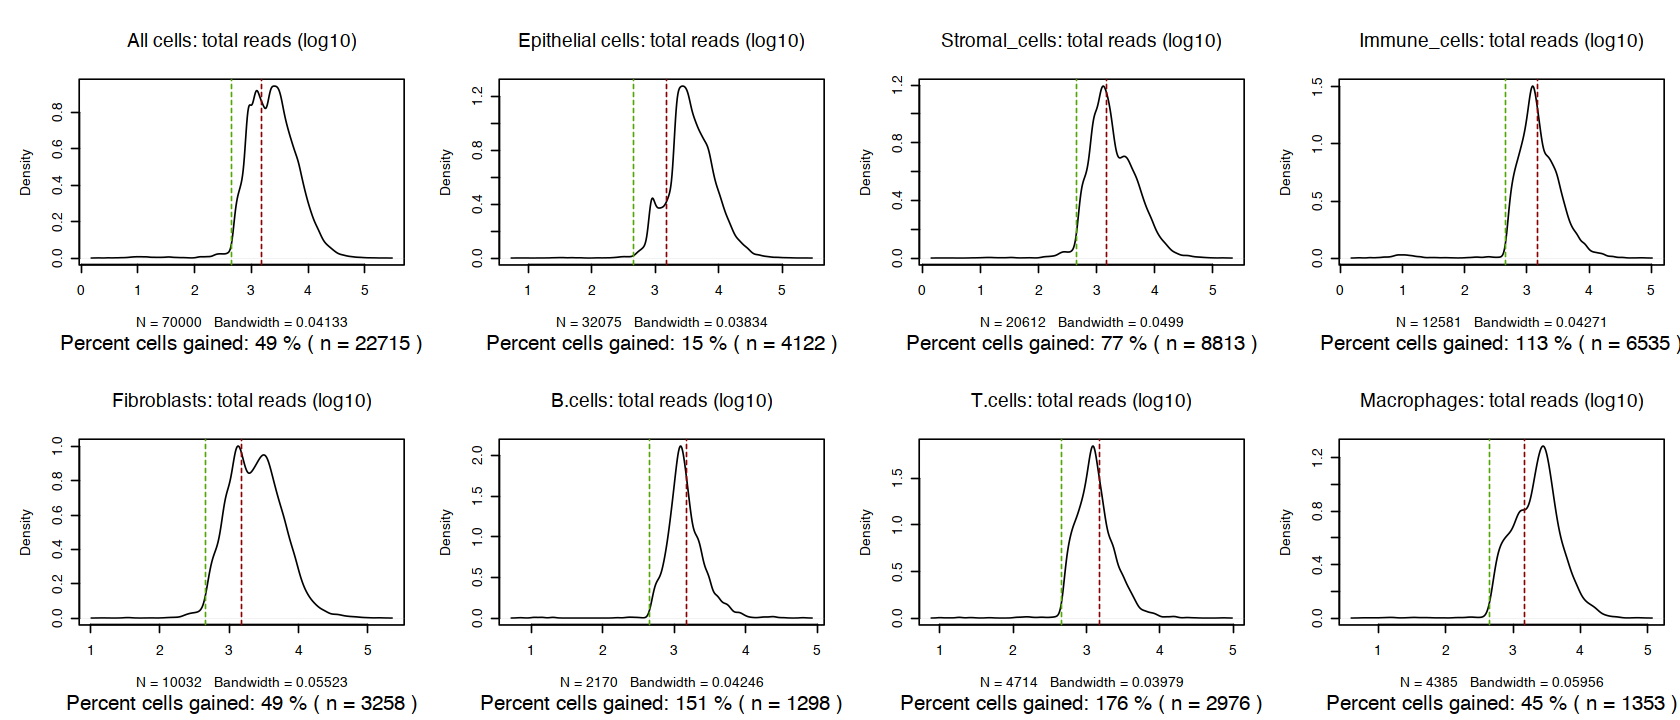

In [256]:
# Figure 5a

options(repr.plot.width=14, repr.plot.height=6)

title.size <- 1.4
lab.size <- 1.0
sub.size <- 1.4


## Plot number of reads and genes by lineage
pdf('Figures/Fig.5a.pdf', width = 14, height = 6)
par(mfrow=c(2,4), mar=c(6,5,5,1))

plot(main = "All cells: total reads (log10)", density(log10(meta_sub$nCount_RNA)), , cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
mtext(line= -17.2, adj=0.5, cex=1, paste('Percent cells gained:', round(100*post.retained.all/pre.retained.all),'%', '( n =', post.retained.all, ')' ))  # subtitle

plot(main = "Epithelial cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[epi.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
mtext(line= -17.2, adj=0.5, cex=1, paste('Percent cells gained:', round(100*post.retained.epi/pre.retained.epi),'%', '( n =', post.retained.epi, ')' ))  # subtitle

plot(main = "Stromal_cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[mes.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
mtext(line= -17.2, adj=0.5, cex=1, paste('Percent cells gained:', round(100*post.retained.mes/pre.retained.mes),'%', '( n =', post.retained.mes, ')' ))  # subtitle

plot(main = "Immune_cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[hem.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
mtext(line= -17.2, adj=0.5, cex=1, paste('Percent cells gained:', round(100*post.retained.hem/pre.retained.hem),'%', '( n =', post.retained.hem, ')' ))  # subtitle

plot(main = "Fibroblasts: total reads (log10)", density(log10(meta_sub$nCount_RNA[fibro.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
mtext(line=  -17.2, adj=0.5, cex=1, paste('Percent cells gained:', round(100*post.retained.fibro/pre.retained.fibro),'%', '( n =', post.retained.fibro, ')' ))  # subtitle

plot(main = "B.cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[bcell.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
mtext(line=  -17.2, adj=0.5, cex=1, paste('Percent cells gained:', round(100*post.retained.bcell/pre.retained.bcell),'%', '( n =', post.retained.bcell, ')' ))  # subtitle

plot(main = "T.cells: total reads (log10)", density(log10(meta_sub$nCount_RNA[tcell.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
mtext(line=  -17.2, adj=0.5, cex=1, paste('Percent cells gained:', round(100*post.retained.tcell/pre.retained.tcell),'%', '( n =', post.retained.tcell, ')' ))  # subtitle

plot(main = "Macrophages: total reads (log10)", density(log10(meta_sub$nCount_RNA[macro.ind])), cex.main = title.size, cex.lab = lab.size, cex.sub= sub.size); abline(v=log10(nCount_RNA_cutoff), lty=2, col="darkred"); abline(v=log10(new.nCount_RNA_cutoff), lty=2, col="#51a706")
mtext(line= -17.2, adj=0.5, cex=1, paste('Percent cells gained:', round(100*post.retained.macro/pre.retained.macro),'%', '( n =', post.retained.macro, ')' ))  # subtitle

dev.off()


In [252]:
# Figure 5b
ct.pre <- c(pre.retained.epi,pre.retained.mes,pre.retained.hem, pre.retained.fibro, pre.retained.bcell,pre.retained.tcell,pre.retained.macro)
ct.post <- c(post.retained.epi,post.retained.mes,post.retained.hem, post.retained.fibro, post.retained.bcell,post.retained.tcell,post.retained.macro)
# pct <- pct.gained
label<- c('Epithelial', 'Stromal', 'Immune', 'Fibroblasts', 'B-cells', 'T-cells', 'Macrophages')
type <- c(rep('Lineage',3), rep('Celltype',4))
data <- melt(data.frame(label , ct.pre, ct.post, type  ))

data.lin <- data[data$type == 'Lineage' , ]
data.type <- data[data$type == 'Celltype' , ]

plot1 <- ggplot(data=data.lin, aes(x=label, y=value, fill=fct_rev(variable))) +
  geom_bar(stat="identity") +
  theme_classic() +
  scale_fill_manual(values=c('#77f670','#4e8bf3'))

plot2 <- ggplot(data=data.type, aes(x=label, y=value, fill=fct_rev(variable))) +
  geom_bar(stat="identity") + 
  theme_classic() +
  scale_fill_manual(values=c('#77f670','#4e8bf3'))

p <- plot1 + plot2 & theme(legend.position = "right")


pdf('Figures/Fig.5b.pdf', width = 7, height = 5.5)
   p + plot_layout(guides = "collect")
dev.off()
  options(repr.plot.width=7, repr.plot.height=5.5)


Warning message in melt(data.frame(label, ct.pre, ct.post, type)):
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(data.frame(label, ct.pre, ct.post, type)). In the next version, this warning will become an error."
Using label, type as id variables



pdf 
  2

In [3]:
# supplementary figure 4 

library(qs)
library(Seurat)
library(ggplot2)

setwd('/Users/ibishara/Desktop/FELINE_C1/')

## Generate UMAP for untransformed HQ
seu_HQ <- qread(file = "seu_HQ_no_id.qs")
seu_HQ <- subset(x = seu_HQ, subset = Celltype != "Normal epithelial cells")   ## Removes normal epithelial cells. Genes unique to normal epi cells are removed from analysis downstream
seu_HQ <- subset(seu_HQ, subset = nCount_RNA < 15000 ) 

## Normalize and scale 
seu_HQ <- NormalizeData(seu_HQ, verbose = FALSE)
genes <- rownames(seu_HQ)
seu_HQ <- ScaleData(seu_HQ, features = genes, verbose = FALSE)
seu_HQ <- RunPCA(seu_HQ, features = genes, verbose = FALSE)
# ElbowPlot(seu_HQ, ndims = 50)

## Cell clustering
seu_HQ <- FindNeighbors(seu_HQ, dims = 1:20, verbose = FALSE) 
seu_HQ <- FindClusters(seu_HQ, resolution = 0.1, verbose = FALSE)

## UMAP
seu_HQ <- RunUMAP(seu_HQ, dims = 1:20, verbose = FALSE)

pdf('Figures/Supp.4a.pdf', width = 6, height = 4)
    DimPlot(seu_HQ, reduction = "umap", group.by = 'Lineage') 
dev.off()

pdf('Figures/Supp.4b.pdf', width = 6, height = 4)
    DimPlot(seu_HQ, reduction = "umap", group.by = 'Celltype') 
dev.off()

options(repr.plot.width=4, repr.plot.height=6)


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


pdf 
  2

pdf 
  2

In [52]:
# supplementary figure 1

# Celltype & Lineage gene expression 

Idents(object = seu_HQ) <- "Lineage"
pdf('Figures/Supp.4b.pdf', width = 6, height = 4)
    DotPlot(seu_HQ, assay = 'RNA',  features = c('KRT19', 'CDH1', # Epithelial
                            'FAP', 'HTRA1', # Stromal
                            'PTPRC'# Immune
                            )) + 
                            ylab ( 'Lineage')  + 
                            xlab ( 'Marker gene') + 
                            theme(axis.text.x = element_text(angle = 45, hjust=1))

dev.off()


Idents(object = seu_HQ) <- "Celltype"
pdf('Figures/Supp.4a.pdf', width = 8, height = 4)
    DotPlot(seu_HQ, assay = 'RNA',  features = c('CSF1R' , "CD163", # macrophages 
                            "CD2", "CD247", # T-cell
                            'MS4A1', 'IGHM', # B-cell
                            "COL5A1", "FBLN1", # fibroblasts
                            'VWF', # Endothelial
                            'RGS5', # Pericytes
                            "CIDEA" # Adipocytes
                            )) + 
                            ylab ( 'Cell type')  + 
                            xlab ( 'Marker gene') + 
                            theme(axis.text.x = element_text(angle = 45, hjust=1))
dev.off()

options(repr.plot.width=6, repr.plot.height=4)


pdf 
  2

pdf 
  2